# Exploring growth models from Scott and Hwa with respect to proteome partitioning

In [37]:
import matplotlib.pyplot
import numpy as np

## Empirical obervations

Positive correlation between RNA/Protein ratio and growth rate with increasing nutrient quality, conditioned on translation efficiency $\gamma$

$r=r_0+\frac{\lambda}{\gamma}$

Negative correlation between RNA/Potein ratio and growth rate with increasing translation inhibition, conditioned on nutrient capacity $\nu$

$r=r_{max}-\frac{\lambda}{\nu}$

Making the transformation to the ribosome associated fraction of the proteome as follows: $\Phi_R=\rho r$, we can rewrite the above empirical observations as follows

$\Phi_R=\Phi_R^0 + \frac{\lambda}{\gamma}$

and

$\Phi_R=\Phi_R^{max}-\frac{\lambda}{\nu}$

For bacteria, the empirical correlations show $\Phi_R^0=0.07, \Phi_R^{max}=0.55,\gamma_0=5.9, \nu_0=2.5$, where $\gamma_0,\nu_0$ are the maximal translational and nutritional capacities.

In [38]:
gamma0=5.9
nu0=5.8
phiRmax=0.55
phiR0=0.07

The steady state amino acid pool `astar` concentration will be varied over three orders of magnitude.

In [39]:
astar=np.logspace(-5,-2)

 These parameters are assumed to have a sigmoidal dependence on nutrient quality, or more specifically on the steady state amino acid pool sizes as follows:

$\gamma=\gamma_0\frac{(a^*/K_t)^2}{1+(a^*/K_t)^2}$ where $K_t$ is assigned the value $10^{-4}$

In [40]:
Kt=1e-4
gamma=gamma0*((astar/Kt)**2)/(1+(astar/Kt)**2)

$\nu=\nu_0\frac{1}{1+(a^*/K_n)^2}$  and $K_n$ is assumed to be 5$K_t$

In [41]:
Kn=5e-4
nu=nu0*(1/(1+(astar/Kn)**2))

The integrated dependence of the ribosome associated fraction of the proteome can be expressed as 

$\Phi_R=(\Phi_R^{max}-\Phi_R^0)\frac{\nu}{\gamma+\nu} + \Phi_R^0$

In [42]:
phiR=(phiRmax-phiR0)*(nu/(nu+gamma))+phiR0

Since both $\nu$ and $\gamma$ are dependent on the steady state amino acid pool, we can study how $\Phi_R$ varies wih amino acid input. 

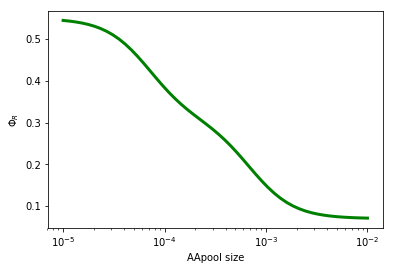

In [43]:
plt.plot(astar,phiR,'g',lw=3)
plt.xscale('log')
plt.xlabel('AApool size')
plt.ylabel('$\Phi_R$')
plt.show()

and that for growth rate is expressed as 

$\lambda = (\Phi_R^{max}-\Phi_R^0)\frac{\gamma \nu}{\gamma+\nu}$

In [44]:
growth_rate=(phiRmax-phiR0)*(nu*gamma/(nu+gamma))

We can now plot the trends to study the variation of growth rate with ribosomal fraction across the entire range of amino acid concentrations

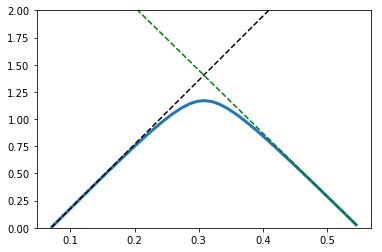

In [46]:
plt.plot()
plt.plot(phiR,growth_rate,lw=3)
plt.plot(phiR,gamma0*(phiR-phiR0),'k--')
plt.plot(phiR,nu0*(phiRmax-phiR),'g--')
plt.ylim([0,2.0])

plt.show()